# TP06 Exercice 1
# $\pi$ par méthode de Monte Carlo avec Dask Array
## Implémentation Numpy

In [1]:
import numpy as np
import dask.array as da

In [2]:
sample = 100_000_000

In [3]:
%%time
xxyy = np.random.uniform(-1, 1, size=(2, sample))

CPU times: user 857 ms, sys: 164 ms, total: 1.02 s
Wall time: 1.02 s


In [4]:
xxyy

array([[ 0.60233504, -0.87410823, -0.54626192, ..., -0.64939425,
        -0.49440812,  0.31322599],
       [ 0.71080513, -0.7654835 , -0.20136902, ...,  0.3958891 ,
        -0.02505664, -0.96194028]])

In [5]:
xxyy.shape

(2, 100000000)

In [6]:
xxyy.nbytes

1600000000

In [7]:
%%time
norm = np.linalg.norm(xxyy, axis=0)
summ = np.sum(norm <= 1)
pi = 4 * summ / sample

CPU times: user 459 ms, sys: 322 ms, total: 781 ms
Wall time: 781 ms


In [8]:
print("pi ~= {}".format(pi))

pi ~= 3.14146192


## Implémentation Dask

In [9]:
sample = 100_000_000

In [10]:
%%time
xxyy=da.random.uniform(-1, 1, size=(2, sample))
xxyy.nbytes

CPU times: user 2.24 ms, sys: 0 ns, total: 2.24 ms
Wall time: 2.45 ms


1600000000

In [11]:
%%time
norm = da.linalg.norm(xxyy, axis=0)
summ = da.sum(norm <= 1)
pi = 4 * summ / sample

CPU times: user 4.92 ms, sys: 4.85 ms, total: 9.77 ms
Wall time: 9.62 ms


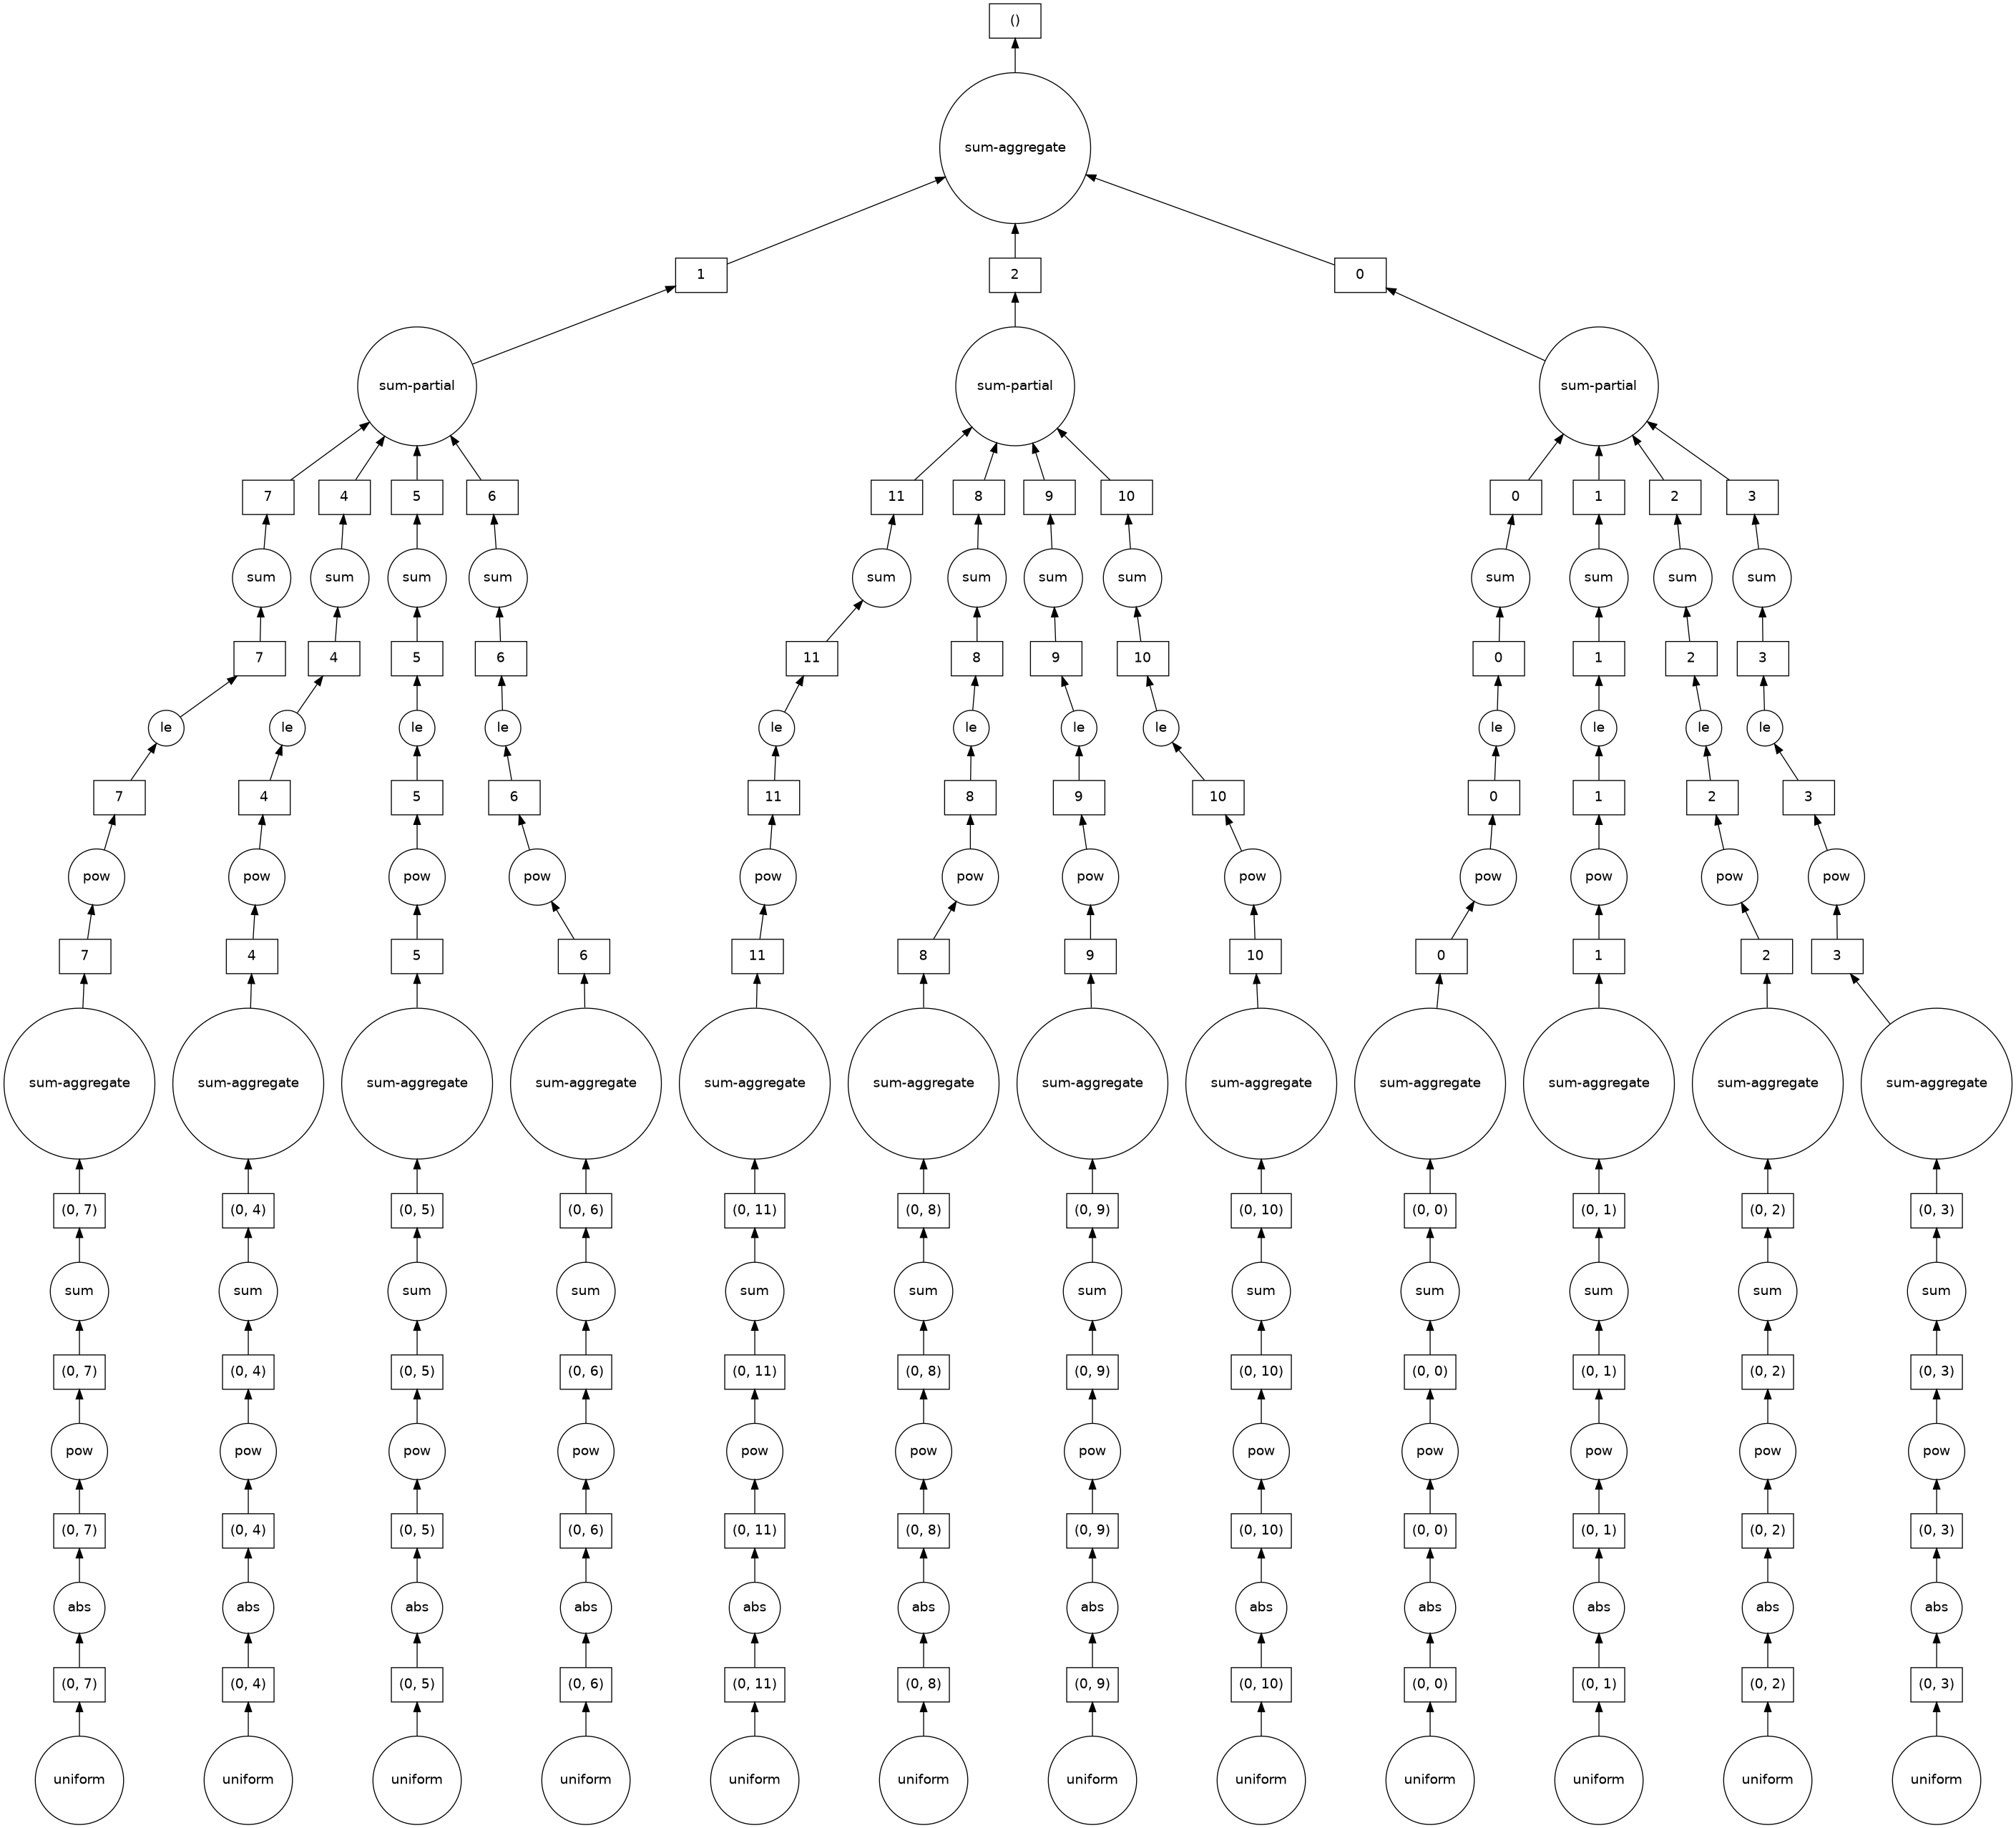

In [12]:
summ.visualize()

In [13]:
%time
print("pi ~= {}".format(pi.compute()))

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs
pi ~= 3.14176652


In [14]:
sample = 100_000_0000

In [15]:
%%time
xxyy=da.random.uniform(-1, 1, size=(2, sample))
xxyy.nbytes

CPU times: user 2.21 ms, sys: 1.15 ms, total: 3.36 ms
Wall time: 3.07 ms


16000000000

In [16]:
%%time
norm = da.linalg.norm(xxyy, axis=0)
summ = da.sum(norm <= 1)
pi = 4 * summ / sample

CPU times: user 6.09 ms, sys: 89 μs, total: 6.18 ms
Wall time: 6.16 ms


In [17]:
summ.visualize()

In [18]:
%time
print("pi ~= {}".format(pi.compute()))

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 5.25 μs
pi ~= 3.1415369
